train shape (493, 7, 5) (493,)
test shape (1253, 7, 5) (1253,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 7, 5, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 5, 64)       │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 320)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 7, 128)         │       229,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,049 (1.08 MB)

 Trainable params: 282,049 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1731 - mse: 0.1733
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mse: 0.0120
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mse: 0.0037
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mse: 0.0028
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mse: 0.0023
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mse: 0.0024
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mse: 0.0020
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mse: 0.0022
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mse: 0.0021
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mse: 0.0021
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mse: 0.0020
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mse: 0.0019
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

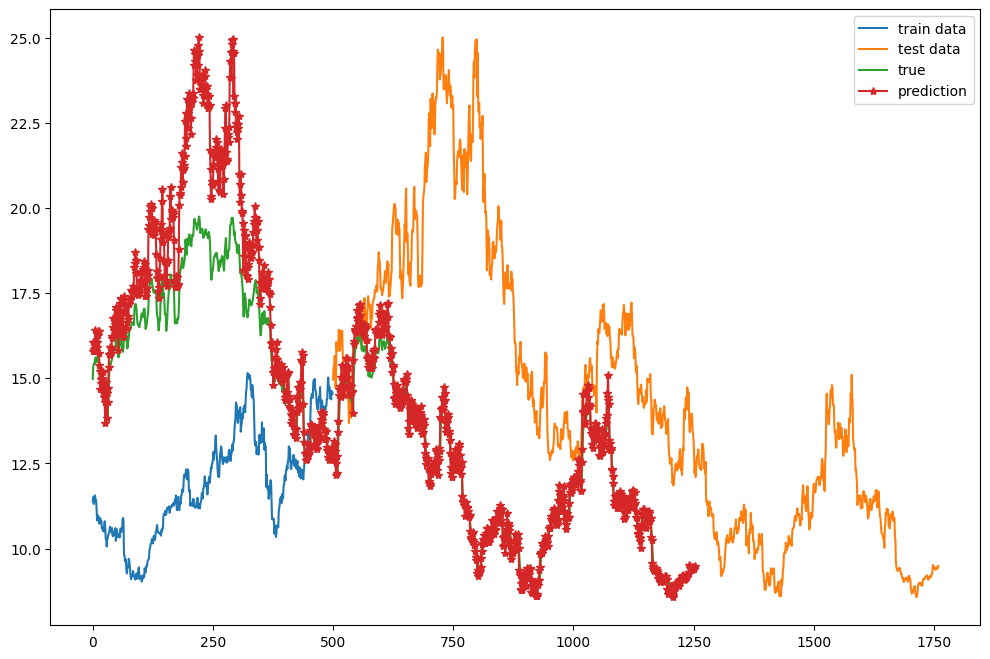

In [1]:
import akshare as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# 获取中国平安三年内K线数据
data = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170301", end_date='20240528', adjust="")
data.index = pd.to_datetime(data.index)
data = data.rename(columns={'开盘': 'open', '最高': 'high', '收盘': 'close', '最低': 'low', '成交量': 'volume'})

data = data[['open', 'high', 'close', 'low', 'volume']]
data = data[::-1].reindex()
data.to_csv('./data.csv')

# 窗口划分
def split_windows(data, size):
    X = []
    Y = []
    for i in range(len(data) - size):
        X.append(data[i:i+size, :])
        Y.append(data[i+size, 2])
    return np.array(X), np.array(Y)

df = pd.read_csv('./data.csv', usecols=['open', 'high', 'close', 'low', 'volume'])
all_data = df.values
train_len = 500
train_data = all_data[:train_len, :]
test_data = all_data[train_len:, :]
 
 
plt.figure(figsize=(12, 8))
plt.plot(np.arange(train_data.shape[0]), train_data[:, 2], label='train data')
plt.plot(np.arange(train_data.shape[0], train_data.shape[0] + test_data.shape[0]), test_data[:, 2], label='test data')
plt.legend()

# normalizatioin processing
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)
# 训练集测试集划分
window_size = 7
train_X, train_Y = split_windows(scaled_train_data, size=window_size)
test_X, test_Y = split_windows(scaled_test_data, size=window_size)
print('train shape', train_X.shape, train_Y.shape)
print('test shape', test_X.shape, test_Y.shape)

window_size = 7
fea_num = 5
 
 
model = keras.models.Sequential([
    keras.layers.Input((window_size, fea_num)),
    keras.layers.Reshape((window_size, fea_num, 1)),
    keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           strides=1,
                           padding="same",
                           activation="relu"),
    keras.layers.MaxPooling2D(pool_size=2, strides=1, padding="same"),
    keras.layers.Dropout(0.3),
    keras.layers.Reshape((window_size, -1)),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(64, return_sequences=False),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)
])
 
 
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

model.fit(x=train_X, y=train_Y, epochs=50)

prediction = model.predict(test_X)
scaled_prediction = prediction * (scaler.data_max_[2] - scaler.data_min_[2]) + scaler.data_min_[2]
scaled_true = test_Y * (scaler.data_max_[2] - scaler.data_min_[2]) + scaler.data_min_[2]
plt.plot(range(len(scaled_prediction)), scaled_prediction, label='true')
plt.plot(range(len(scaled_true)), scaled_true, label='prediction', marker='*')
plt.legend()
 
 
from sklearn.metrics import mean_squared_error
print('RMSE', np.sqrt(mean_squared_error(scaled_prediction, scaled_true)))